## Initial EDA Summary Code:

In [3]:
import pandas as pd

# Load the dataset
df = pd.read_csv("/Users/reemabalharith/Desktop/Capston Project/UpdatedResumeDataSet.csv")

# Show first 5 rows
print("First 5 rows of the dataset:")
print(df.head())
print("******************************************************")

# Show basic info (column names, data types, non-null values)
print("\n Dataset info:")
print(df.info())
print("******************************************************")

# Show summary statistics (only for object/text columns in this case)
print("\n Summary statistics:")
print(df.describe(include='all'))
print("******************************************************")

# Check for missing values
print("\n Missing values per column:")
print(df.isnull().sum())
print("******************************************************")

# Count duplicate rows
print("\n Number of duplicate rows:")
print(df.duplicated().sum())
print("******************************************************")

# Count unique categories
print("\n Number of unique categories:")
print(df['Category'].nunique())
print("******************************************************")

# Show top 5 most frequent categories
print("\n Top 5 most common categories:")
print(df['Category'].value_counts().head(5))
print("******************************************************")


First 5 rows of the dataset:
       Category                                             Resume
0  Data Science  Skills * Programming Languages: Python (pandas...
1  Data Science  Education Details \r\nMay 2013 to May 2017 B.E...
2  Data Science  Areas of Interest Deep Learning, Control Syste...
3  Data Science  Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4  Data Science  Education Details \r\n MCA   YMCAUST,  Faridab...
******************************************************

 Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  962 non-null    object
 1   Resume    962 non-null    object
dtypes: object(2)
memory usage: 15.2+ KB
None
******************************************************

 Summary statistics:
              Category                                             Resume
count              962                       

## Remove Duplicates & Clean Resume Text

In [4]:
import re

# Remove duplicate rows
df = df.drop_duplicates()
print(" Duplicates removed. Remaining rows:", len(df))

# Define a text cleaning function
def clean_resume(text):
    text = re.sub(r'<[^>]+>', ' ', text)      # Remove HTML tags
    text = text.replace('â€¢', '•')            # Replace weird bullet character
    text = text.replace('\r', ' ').replace('\n', ' ')  # Replace newlines
    text = re.sub(r'\s+', ' ', text)          # Normalize whitespace
    return text.strip()

# Apply cleaning to the Resume column and save it in a new column
df['Cleaned_Resume'] = df['Resume'].apply(clean_resume)

# Show a few cleaned samples
print("\n Sample cleaned resumes:")
print(df[['Category', 'Cleaned_Resume']].sample(3, random_state=1))
print("******************************************************")



 Duplicates removed. Remaining rows: 166

 Sample cleaned resumes:
                Category                                     Cleaned_Resume
189  Mechanical Engineer  * I'm hard working person. * I'm self confiden...
227                Sales  KEY SKILLS: â¢ Planning & Strategizing â¢ Pr...
827     DotNet Developer  Education Details January 2014 Education Detai...
******************************************************


Visualize Category Distribution

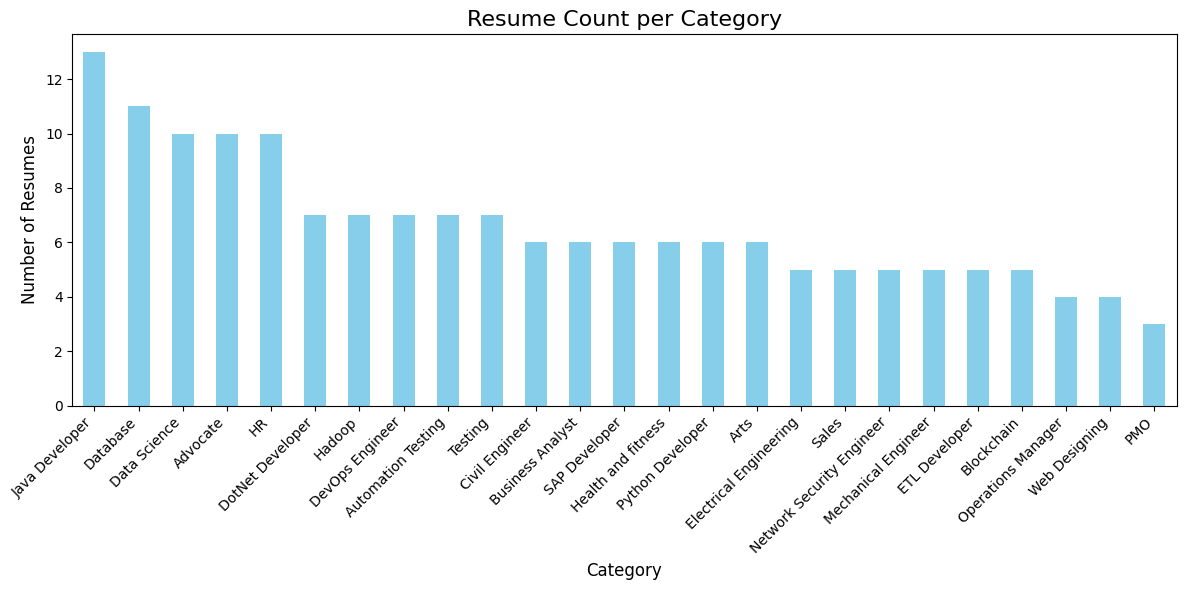

In [5]:
import matplotlib.pyplot as plt

# Set figure size
plt.figure(figsize=(12, 6))

# Plot bar chart of category counts
df['Category'].value_counts().plot(kind='bar', color='skyblue')

# Set titles and labels
plt.title('Resume Count per Category', fontsize=16)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Number of Resumes', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()


## View more and less categories represented

In [6]:
# Top 10 categories
print(" Top 10 most common categories:")
print(df['Category'].value_counts().head(10))
print("******************************************************")

# Bottom 10 categories
print("\n Least 10 common categories:")
print(df['Category'].value_counts().tail(10))
print("******************************************************")


 Top 10 most common categories:
Java Developer        13
Database              11
Data Science          10
Advocate              10
HR                    10
DotNet Developer       7
Hadoop                 7
DevOps Engineer        7
Automation Testing     7
Testing                7
Name: Category, dtype: int64
******************************************************

 Least 10 common categories:
Arts                         6
Electrical Engineering       5
Sales                        5
Network Security Engineer    5
Mechanical Engineer          5
ETL Developer                5
Blockchain                   5
Operations Manager           4
Web Designing                4
PMO                          3
Name: Category, dtype: int64
******************************************************


## Pie Chart for Categories

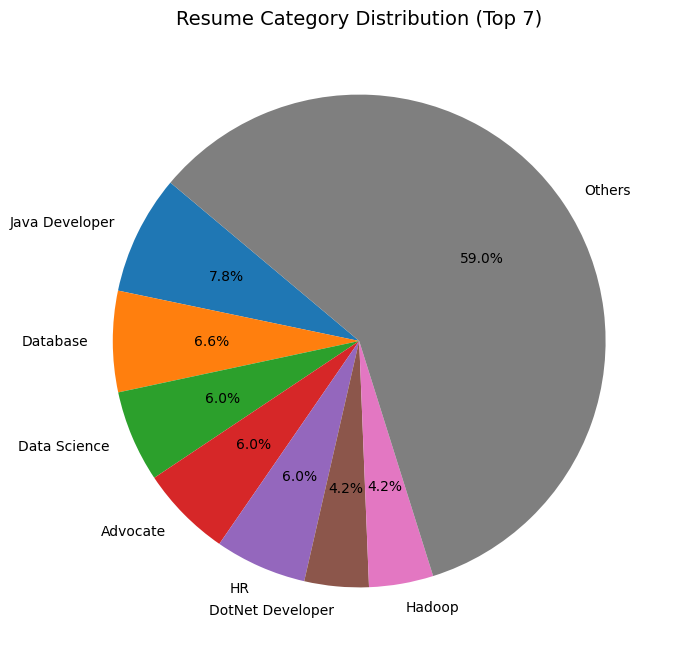

In [7]:
# Top 7 categories only (others grouped)
top_categories = df['Category'].value_counts().nlargest(7)
others_count = len(df) - top_categories.sum()
labels = top_categories.index.tolist() + ['Others']
sizes = top_categories.tolist() + [others_count]

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Resume Category Distribution (Top 7)', fontsize=14)
plt.show()


## Extract Top Frequent Words (Without Common Stopwords)

In [8]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from collections import Counter

# Combine all resumes into one big text
all_text = " ".join(df['Cleaned_Resume'].values)

# Split into words and clean
words = all_text.split()
filtered_words = [word.lower() for word in words if word.lower() not in ENGLISH_STOP_WORDS and word.isalpha()]

# Count word frequency
word_freq = Counter(filtered_words)

# Show top 20 frequent words
print("Top 20 frequent words:")
print(word_freq.most_common(20))
print("******************************************************")


Top 20 frequent words:
[('exprience', 616), ('company', 570), ('details', 525), ('months', 506), ('description', 476), ('project', 473), ('data', 355), ('management', 235), ('database', 218), ('year', 218), ('team', 216), ('maharashtra', 212), ('using', 209), ('business', 192), ('â', 191), ('january', 190), ('skill', 183), ('test', 182), ('sql', 162), ('testing', 155)]
******************************************************


## Generate WordCloud

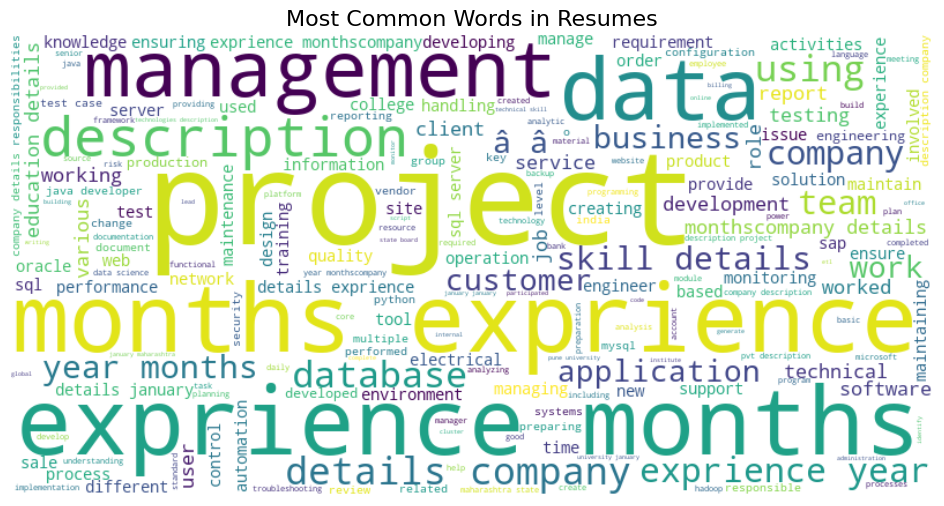

In [9]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create and display the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(filtered_words))

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Most Common Words in Resumes", fontsize=16)
plt.show()


## Extract Skills from Each Resume (Using a Simple Skills List)

In [10]:
# Define a sample list of skills
skill_keywords = ['python', 'java', 'sql', 'excel', 'communication', 'teamwork', 'linux', 'machine learning']

# Define function to check which skills exist in the resume
def extract_skills(text):
    text = text.lower()
    return [skill for skill in skill_keywords if skill in text]

# Apply the skill extraction
df['Skills_Found'] = df['Cleaned_Resume'].apply(extract_skills)

# Show some examples
df[['Category', 'Skills_Found']].sample(5)


,Category,Skills_Found
431,SAP Developer,"[python, java, sql]"
715,Database,"[sql, linux]"
265,Health and fitness,[]
713,Database,"[sql, linux]"
657,Network Security Engineer,[python]


## 2. Train and Test the model 

In [11]:
#Step 1: Prepare the Data for Classification

# Use only the cleaned text and the category
X = df['Cleaned_Resume']
y = df['Category']

# Check the number of categories (labels)
print("Number of unique categories:", y.nunique())
print("Sample categories:", y.unique())
print("******************************************************")

#Step 2: Split the Data (Training & Testing)
from sklearn.model_selection import train_test_split

# Split data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training samples:", len(X_train))
print("Testing samples:", len(X_test))
print("******************************************************")

#Step 3: Convert Text into Vectors (TF-IDF)
from sklearn.feature_extraction.text import TfidfVectorizer

# Convert text into numerical features
tfidf = TfidfVectorizer(stop_words='english', max_features=3000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

#Step 4: Train a Classifier (Logistic Regression)
from sklearn.linear_model import LogisticRegression

# Initialize and train the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train)

#Step 5: Evaluate the Model
from sklearn.metrics import classification_report, accuracy_score

# Make predictions
y_pred = model.predict(X_test_tfidf)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Number of unique categories: 25
Sample categories: ['Data Science' 'HR' 'Advocate' 'Arts' 'Web Designing'
 'Mechanical Engineer' 'Sales' 'Health and fitness' 'Civil Engineer'
 'Java Developer' 'Business Analyst' 'SAP Developer' 'Automation Testing'
 'Electrical Engineering' 'Operations Manager' 'Python Developer'
 'DevOps Engineer' 'Network Security Engineer' 'PMO' 'Database' 'Hadoop'
 'ETL Developer' 'DotNet Developer' 'Blockchain' 'Testing']
******************************************************
Training samples: 132
Testing samples: 34
******************************************************
Accuracy: 0.5

Classification Report:
                           precision    recall  f1-score   support

                 Advocate       1.00      1.00      1.00         2
                     Arts       0.00      0.00      0.00         2
       Automation Testing       0.00      0.00      0.00         0
         Business Analyst       0.00      0.00      0.00         3
           Civil Engineer 

/Users/reemabalharith/anaconda3/envs/resume/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/reemabalharith/anaconda3/envs/resume/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/reemabalharith/anaconda3/envs/resume/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifie

In [14]:
import joblib

# Save the trained model
joblib.dump(model, 'cv_classifier_model.pkl')

# Save the TF-IDF vectorizer
joblib.dump(tfidf, 'tfidf_vectorizer.pkl')

print(" Model and vectorizer saved successfully!")


 Model and vectorizer saved successfully!
